In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os
from analysis_functions import Analysis

# 1) Analysis of the gradients

In [55]:
# Let's start by loading the data of the agents traines with continuous encoding
path_skolik_baseline_lskolik = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_basic_lskolik = "../../results/continuous/skolik_arch/basic_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_schuld_datareup_lskolik = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"

analysis_baseline = Analysis(path_skolik_baseline_lskolik)
analysis_basic = Analysis(path_skolik_basic_lskolik)
analysis_schuld = Analysis(path_skolik_schuld_datareup_lskolik)

In [56]:
moving_average_baseline = analysis_baseline.get_moving_average(25)
moving_average_basic = analysis_basic.get_moving_average(25)
moving_average_schuld = analysis_schuld.get_moving_average(25)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


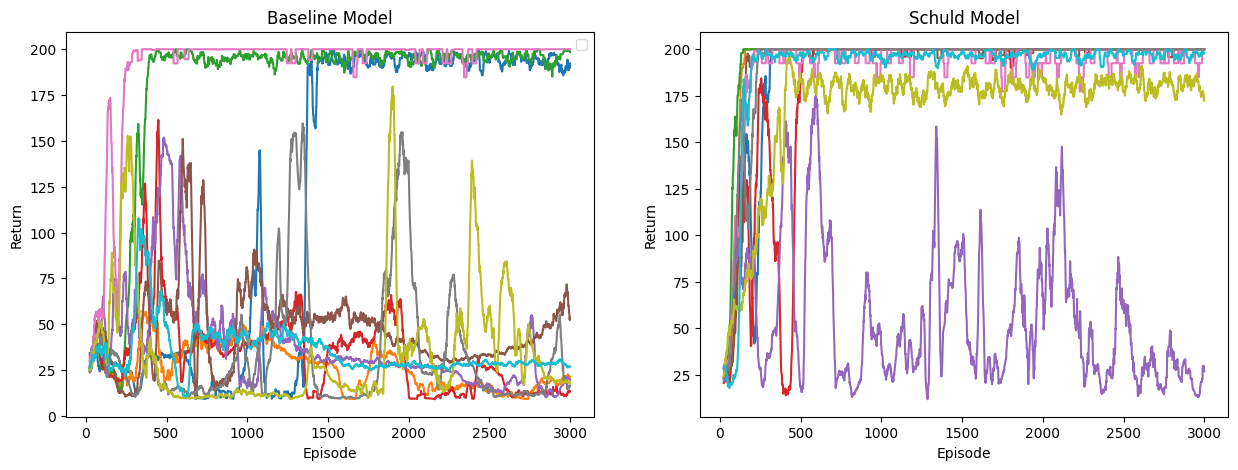

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(analysis_baseline.number_of_agents):
    axs[0].plot(moving_average_baseline[i])
    axs[1].plot(moving_average_schuld[i])

axs[0].set_title("Baseline Model")
axs[1].set_title("Schuld Model")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Return")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Return")
axs[0].legend()

In [58]:
moving_average_schuld = [lst for lst in moving_average_schuld if len(lst) == 3000]

for list in moving_average_schuld:
    print(len(list))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000


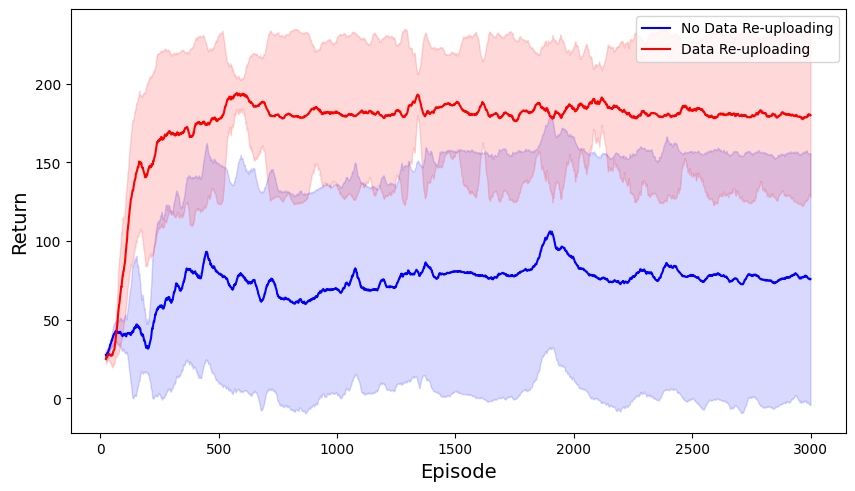

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# calculate the mean and standard deviation of the moving averages for each agent
means_baseline = np.mean(moving_average_baseline, axis=0)
stds_baseline = np.std(moving_average_baseline, axis=0)
means_schuld = np.mean(moving_average_schuld, axis=0)
stds_schuld = np.std(moving_average_schuld, axis=0)

# plot the mean of the moving averages for each agent with different colors
plt.figure(figsize=(10, 5.5))
plt.plot(means_baseline, color='blue', linewidth=1.5, label='No Data Re-uploading')
plt.plot(means_schuld, color='red', linewidth=1.5, label='Data Re-uploading')

# add shaded regions for the standard deviation of the moving averages
plt.fill_between(range(len(means_baseline)), means_baseline-stds_baseline, means_baseline+stds_baseline, color='blue', alpha=0.15)
plt.fill_between(range(len(means_schuld)), means_schuld-stds_schuld, means_schuld+stds_schuld, color='red', alpha=0.15)

# add labels and title
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()

# show the plot
plt.show()


In [60]:
baseline_mean, baseline_variance = analysis_baseline.get_gradients_all_params()
basic_mean, basic_variance = analysis_basic.get_gradients_all_params()
schuld_mean, schuld_variance = analysis_schuld.get_gradients_all_params()

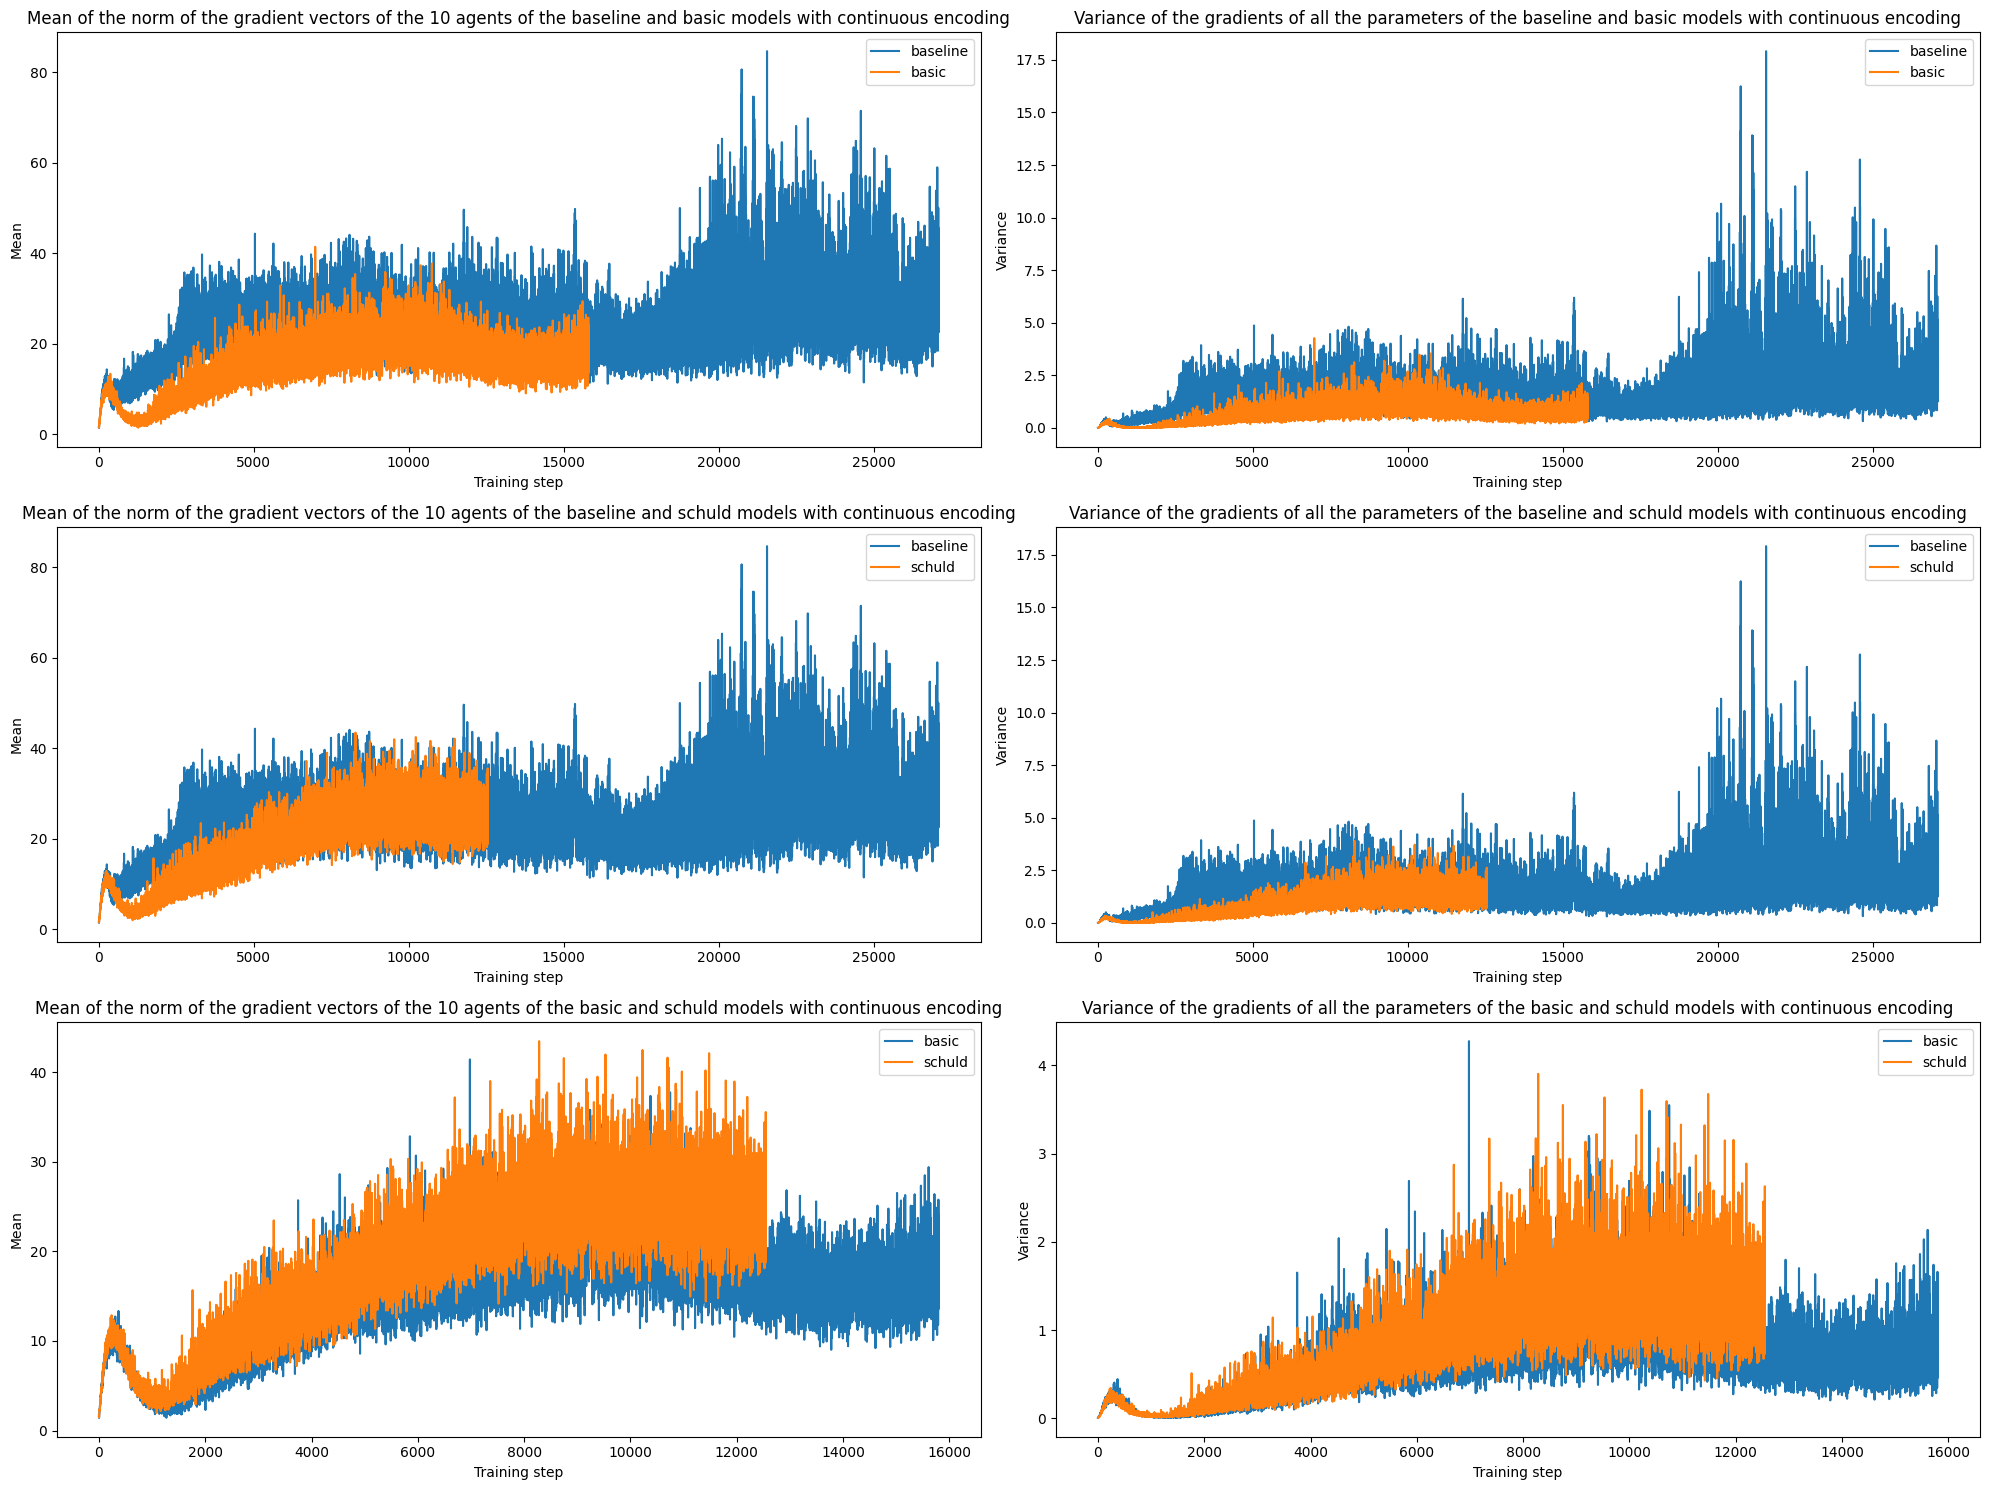

In [6]:
fig, axs = plt.subplots(3,2, tight_layout=True, figsize=(20, 15))

axs[0,0].set_title("Mean of the norm of the gradient vectors of the 10 agents of the baseline and basic models with continuous encoding")
axs[0,0].set_xlabel("Training step")
axs[0,0].set_ylabel("Mean")
axs[0,0].plot(baseline_mean, label = "baseline")
axs[0,0].plot(basic_mean, label = "basic")
axs[0,0].legend()

axs[0,1].set_title("Variance of the gradients of all the parameters of the baseline and basic models with continuous encoding")
axs[0,1].set_xlabel("Training step")
axs[0,1].set_ylabel("Variance")
axs[0,1].plot(baseline_variance, label = "baseline")
axs[0,1].plot(basic_variance, label = "basic")
axs[0,1].legend()




axs[1,0].set_title("Mean of the norm of the gradient vectors of the 10 agents of the baseline and schuld models with continuous encoding")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Mean")
axs[1,0].plot(baseline_mean, label = "baseline")
axs[1,0].plot(schuld_mean, label = "schuld")
axs[1,0].legend()

axs[1,1].set_title("Variance of the gradients of all the parameters of the baseline and schuld models with continuous encoding")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Variance")
axs[1,1].plot(baseline_variance, label = "baseline")
axs[1,1].plot(schuld_variance, label = "schuld")
axs[1,1].legend()




axs[2,0].set_title("Mean of the norm of the gradient vectors of the 10 agents of the basic and schuld models with continuous encoding")
axs[2,0].set_xlabel("Training step")
axs[2,0].set_ylabel("Mean")
axs[2,0].plot(basic_mean, label = "basic")
axs[2,0].plot(schuld_mean, label = "schuld")
axs[2,0].legend()

axs[2,1].set_title("Variance of the gradients of all the parameters of the basic and schuld models with continuous encoding")
axs[2,1].set_xlabel("Training step")
axs[2,1].set_ylabel("Variance")
axs[2,1].plot(basic_variance, label = "basic")
axs[2,1].plot(schuld_variance, label = "schuld")
axs[2,1].legend()

plt.show()

In [68]:
# With the baseline_mean, baseline_variance, schuld_mean and schuld_variance variables from the previous cell I want to create a running mean and variance for each model based on the last 100 training steps

moving_baseline_mean = []
moving_baseline_variance = []
moving_schuld_mean = []
moving_schuld_variance = []

for i in range(len(baseline_mean)):
    moving_baseline_mean.append(np.mean(baseline_mean[i-100:i]))
    moving_baseline_variance.append(np.mean(baseline_variance[i-100:i]))
    moving_schuld_mean.append(np.mean(schuld_mean[i-100:i]))
    moving_schuld_variance.append(np.mean(schuld_variance[i-100:i]))

#moving_averages = []
#        for reward in rewards:
#            moving_averages.append(pd.Series(reward).rolling(window_size).mean())

/home/rodrigo_ubuntu/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rodrigo_ubuntu/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


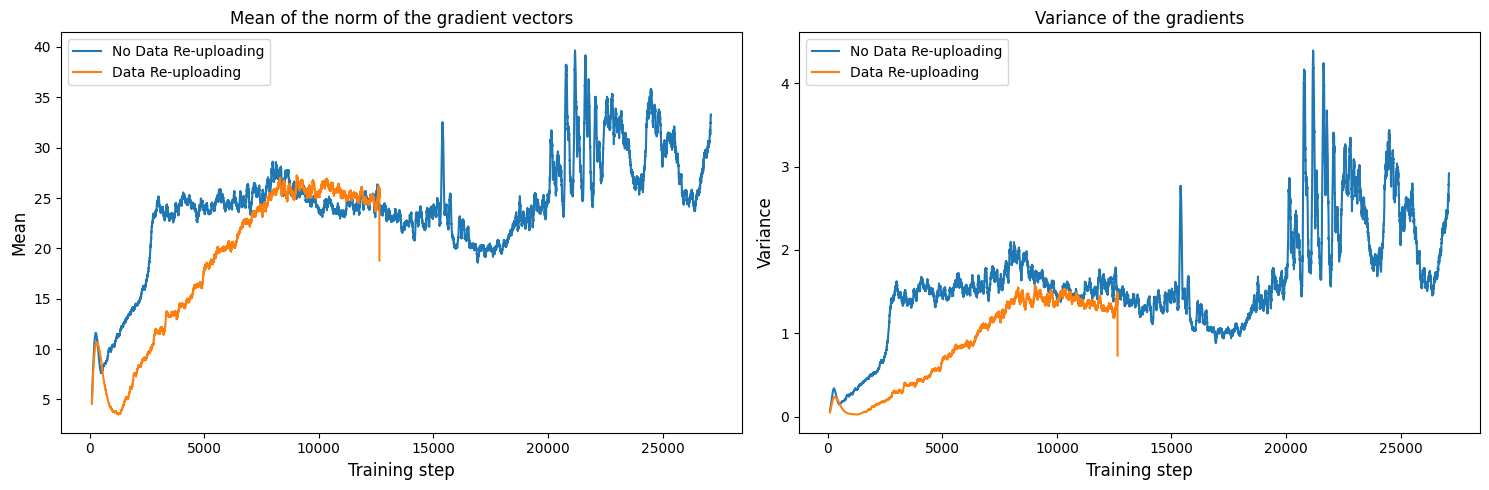

In [69]:
fig, axs = plt.subplots(1, 2, tight_layout = True, figsize=(15, 5))

axs[0].set_title("Mean of the norm of the gradient vectors",fontsize = 12)
axs[0].set_xlabel("Training step",fontsize = 12)
axs[0].set_ylabel("Mean",fontsize = 12)
axs[0].plot(moving_baseline_mean, label = "No Data Re-uploading")
axs[0].plot(moving_schuld_mean, label = "Data Re-uploading")
axs[0].legend()

axs[1].set_title("Variance of the gradients", fontsize = 12)
axs[1].set_xlabel("Training step", fontsize = 12)
axs[1].set_ylabel("Variance", fontsize = 12)
axs[1].plot(moving_baseline_variance, label = "No Data Re-uploading")
axs[1].plot(moving_schuld_variance, label = "Data Re-uploading")
axs[1].legend()

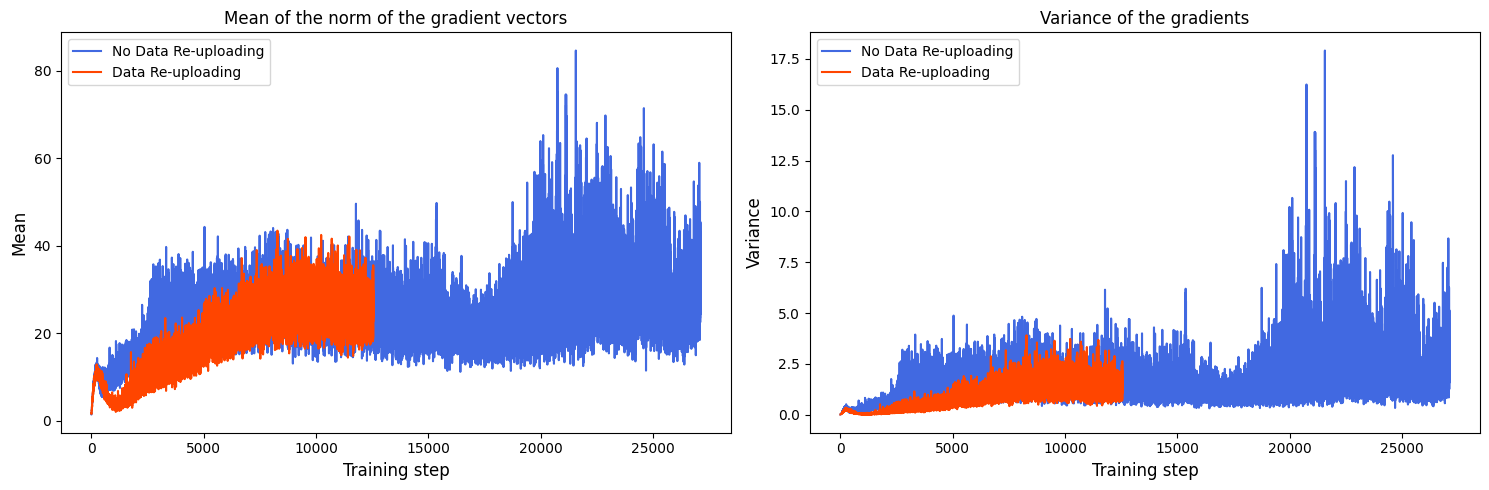

In [101]:
fig, axs = plt.subplots(1, 2, tight_layout = True, figsize=(15, 5))

axs[0].set_title("Mean of the norm of the gradient vectors",fontsize = 12)
axs[0].set_xlabel("Training step",fontsize = 12)
axs[0].set_ylabel("Mean",fontsize = 12)
axs[0].plot(baseline_mean, color = "royalblue", label = 'No Data Re-uploading')
axs[0].plot(schuld_mean,color = "orangered", label = 'Data Re-uploading')
axs[0].legend()

axs[1].set_title('Variance of the gradients', fontsize = 12)
axs[1].set_xlabel('Training step', fontsize = 12)
axs[1].set_ylabel('Variance', fontsize = 12)
axs[1].plot(baseline_variance, color = "royalblue", label = 'No Data Re-uploading')
axs[1].plot(schuld_variance, color = "orangered", label = 'Data Re-uploading')
axs[1].legend()

# 2) Analysis of the agents without output scaling

In [70]:
path_skolik_baseline_lskolik_no_outscaling = "../../results/continuous/skolik_arch/baseline/no_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_basic_lskolik_no_outscaling = "../../results/continuous/skolik_arch/basic_datareup/no_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_schuld_datareup_lskolik_no_outscaling = "../../results/continuous/skolik_arch/schuld_datareup/no_outscaling/ZZ_obs/skolik_optimal_hyper"

analysis_baseline_no_outscaling = Analysis(path_skolik_baseline_lskolik_no_outscaling)
analysis_basic_no_outscaling = Analysis(path_skolik_basic_lskolik_no_outscaling)
analysis_schuld_no_outscaling = Analysis(path_skolik_schuld_datareup_lskolik_no_outscaling)

In [71]:
moving_average_baseline_no_outscaling = analysis_baseline_no_outscaling.get_moving_average(25)
moving_average_basic_no_outscaling = analysis_basic_no_outscaling.get_moving_average(25)
moving_average_schuld_no_outscaling = analysis_schuld_no_outscaling.get_moving_average(25)

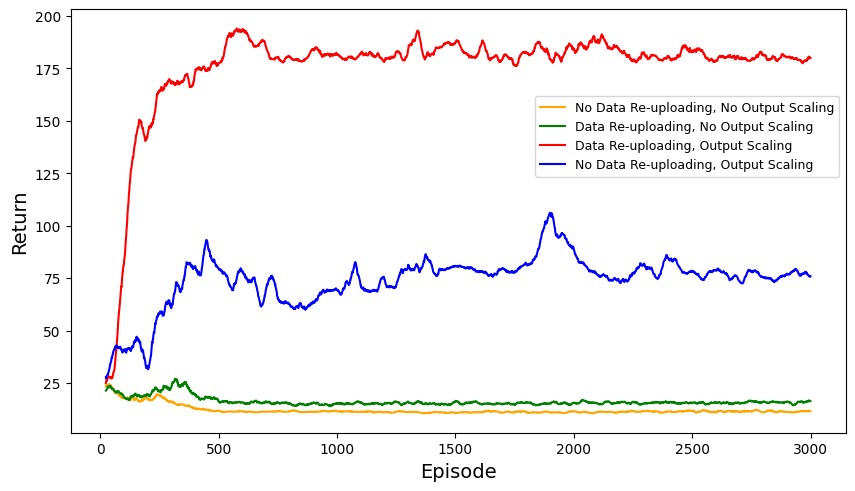

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# calculate the mean and standard deviation of the moving averages for each agent
means_baseline_no_output_scaling = np.mean(moving_average_baseline_no_outscaling, axis=0)
stds_baseline_no_output_scaling = np.std(moving_average_baseline_no_outscaling, axis=0)
means_schuld_no_output_scaling = np.mean(moving_average_schuld_no_outscaling, axis=0)
stds_schuld_no_output_scaling = np.std(moving_average_schuld_no_outscaling, axis=0)

# plot the mean of the moving averages for each agent with different colors
plt.figure(figsize=(10, 5.5))
plt.plot(means_baseline_no_output_scaling, color='orange', linewidth=1.5, label='No Data Re-uploading, No Output Scaling')
plt.plot(means_schuld_no_output_scaling, color='green', linewidth=1.5, label='Data Re-uploading, No Output Scaling')
plt.plot(means_schuld, color='red', linewidth=1.5, label='Data Re-uploading, Output Scaling')
plt.plot(means_baseline, color='blue', linewidth=1.5, label='No Data Re-uploading, Output Scaling')

# add shaded regions for the standard deviation of the moving averages
#plt.fill_between(range(len(means_baseline_no_output_scaling)), means_baseline_no_output_scaling-stds_baseline_no_output_scaling, means_baseline_no_output_scaling+stds_baseline_no_output_scaling, color='blue', alpha=0.15)
#plt.fill_between(range(len(means_schuld_no_output_scaling)), means_schuld_no_output_scaling-stds_schuld_no_output_scaling, means_schuld_no_output_scaling+stds_schuld_no_output_scaling, color='red', alpha=0.15)
#plt.fill_between(range(len(means_baseline)), means_baseline-stds_baseline, means_baseline+stds_baseline, color='yellow', alpha=0.15)
#plt.fill_between(range(len(means_schuld)), means_schuld-stds_schuld, means_schuld+stds_schuld, color='green', alpha=0.15)


# add labels and title
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend(loc= "center right",bbox_to_anchor=(1, 0.7), fontsize=9)

# show the plot
plt.show()


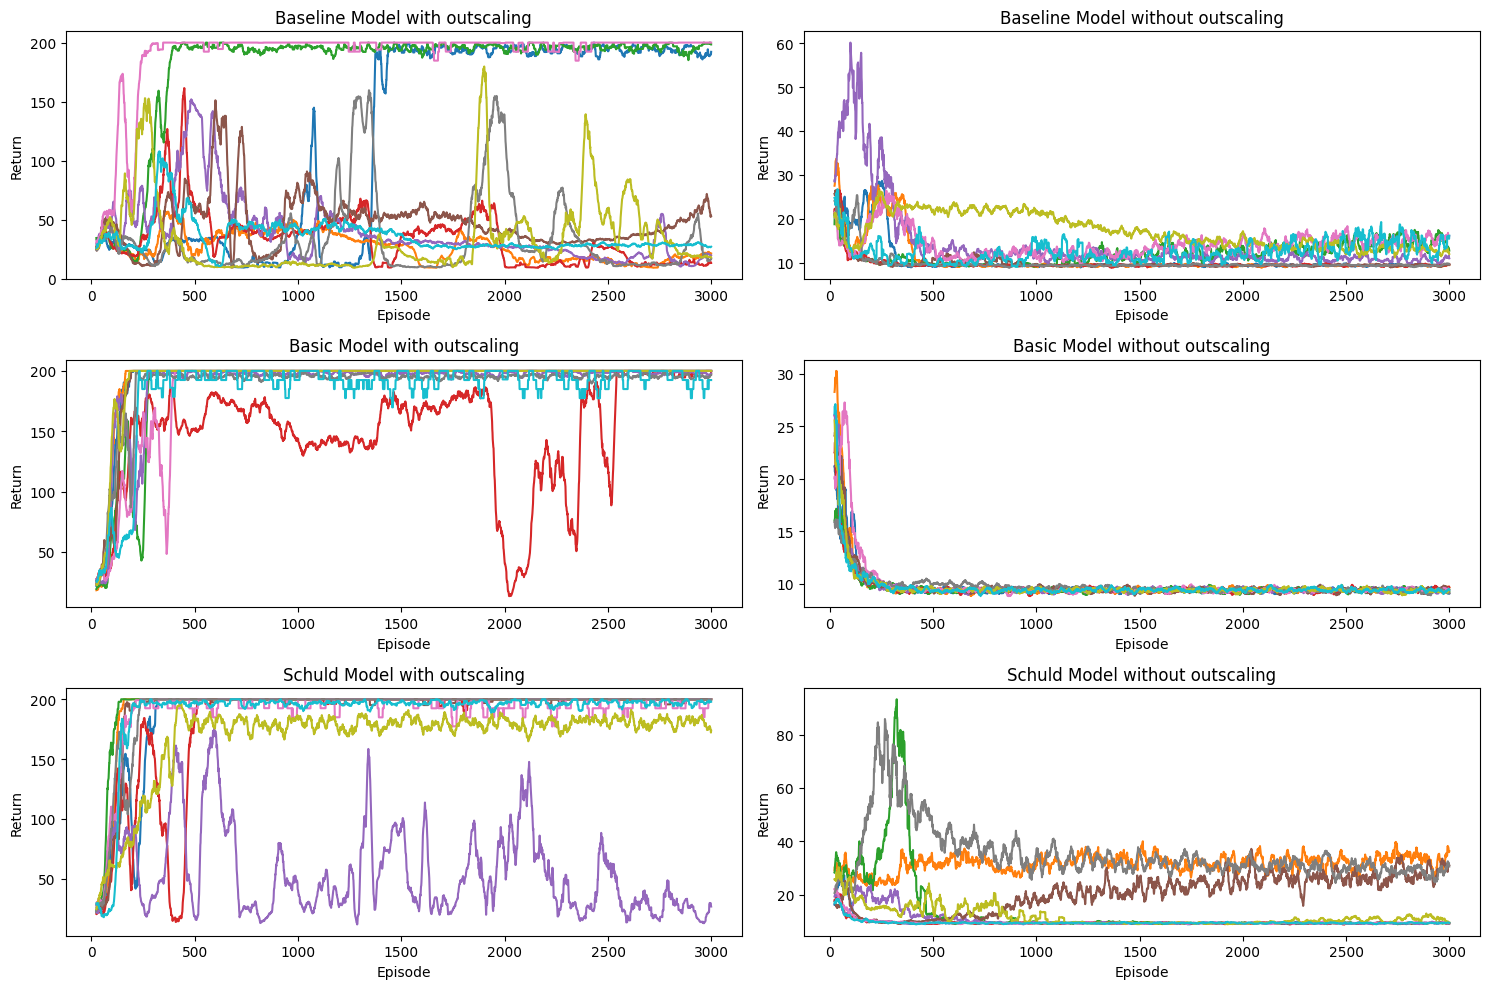

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

for i in range(analysis_baseline.number_of_agents):
    axs[0,0].plot(moving_average_baseline[i])
    axs[0,1].plot(moving_average_baseline_no_outscaling[i])
    axs[1,0].plot(moving_average_basic[i])
    axs[1,1].plot(moving_average_basic_no_outscaling[i])
    axs[2,0].plot(moving_average_schuld[i])
    axs[2,1].plot(moving_average_schuld_no_outscaling[i])

axs[0,0].set_title("Baseline Model with outscaling")
axs[0,1].set_title("Baseline Model without outscaling")
axs[1,0].set_title("Basic Model with outscaling")
axs[1,1].set_title("Basic Model without outscaling")
axs[2,0].set_title("Schuld Model with outscaling")
axs[2,1].set_title("Schuld Model without outscaling")

axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Return")
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Return")
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Return")
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Return")
axs[2,0].set_xlabel("Episode")
axs[2,0].set_ylabel("Return")
axs[2,1].set_xlabel("Episode")
axs[2,1].set_ylabel("Return")

plt.show()

# 3) Analysis of the gradients of the global measurement agents

In [14]:
path_gexpectation_global = "../../my_qlearning/Results/observables/global_normal_global"
path_skolik_global = "../../my_qlearning/Results/observables/global_skolik_global"
path_expectation_local = "../../my_qlearning/Results/observables/global_normal_local"
path_skolik_local = "../../my_qlearning/Results/observables/global_skolik_local"

analysis_gexpectation_global = Analysis(path_gexpectation_global)
analysis_skolik_global = Analysis(path_skolik_global)
analysis_expectation_local = Analysis(path_expectation_local)
analysis_skolik_local = Analysis(path_skolik_local)

In [16]:
gexpectation_global_mean, gexpectation_global_variance = analysis_gexpectation_global.get_gradients_all_params()
skolik_global_mean, skolik_global_variance = analysis_skolik_global.get_gradients_all_params()
expectation_local_mean, expectation_local_variance = analysis_expectation_local.get_gradients_all_params()
skolik_local_mean, skolik_local_variance = analysis_skolik_local.get_gradients_all_params()

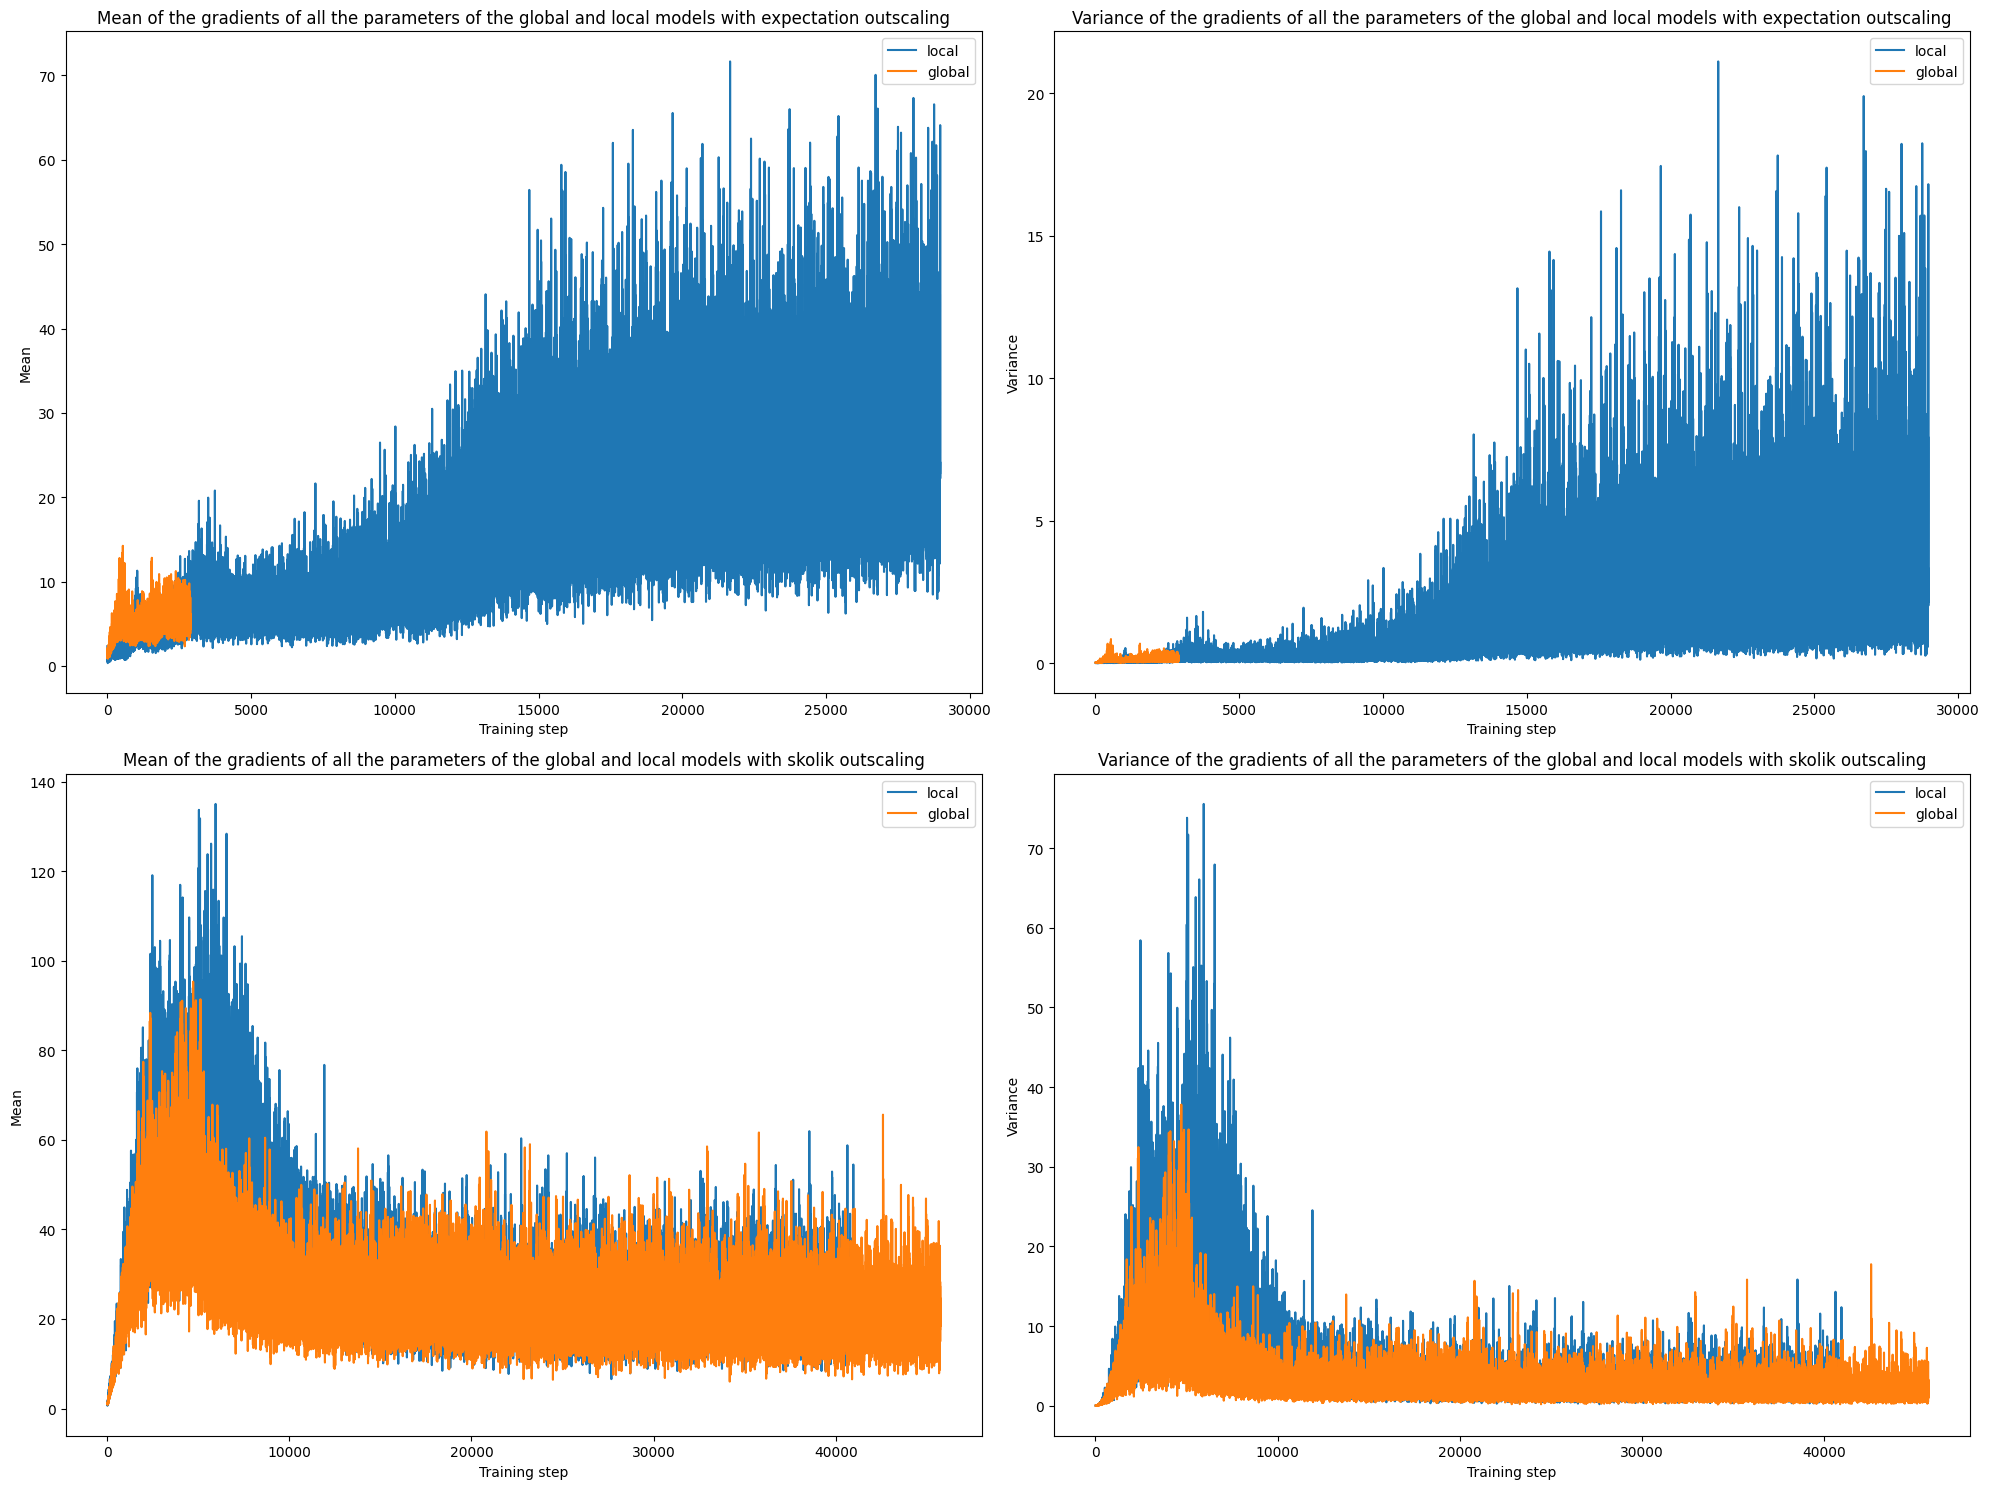

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), tight_layout=True)

axs[0,0].set_title("Mean of the gradients of all the parameters of the global and local models with expectation outscaling")
axs[0,0].set_xlabel("Training step")
axs[0,0].set_ylabel("Mean")
axs[0,0].plot(expectation_local_mean, label = "local")
axs[0,0].plot(gexpectation_global_mean, label = "global")
axs[0,0].legend()

axs[0,1].set_title("Variance of the gradients of all the parameters of the global and local models with expectation outscaling")
axs[0,1].set_xlabel("Training step")
axs[0,1].set_ylabel("Variance")
axs[0,1].plot(expectation_local_variance, label = "local")
axs[0,1].plot(gexpectation_global_variance, label = "global")
axs[0,1].legend()

axs[1,0].set_title("Mean of the gradients of all the parameters of the global and local models with skolik outscaling")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Mean")
axs[1,0].plot(skolik_local_mean, label = "local")
axs[1,0].plot(skolik_global_mean, label = "global")
axs[1,0].legend()

axs[1,1].set_title("Variance of the gradients of all the parameters of the global and local models with skolik outscaling")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Variance")
axs[1,1].plot(skolik_local_variance, label = "local")
axs[1,1].plot(skolik_global_variance, label = "global")
axs[1,1].legend()


# 4) Universal 1-qubit Quantum Classifier

In [2]:
gs_exp_non_path = "../../results/continuous/uqc/globalexpectation_outscaling/lastZ_obs/skolik_non_optimal_hyper"
gs_exp_opt_path = "../../results/continuous/uqc/globalexpectation_outscaling/lastZ_obs/skolik_optimal_hyper"
ls_exp_non_path = "../../results/continuous/uqc/localexpectation_outscaling/lastZ_obs/skolik_non_optimal_hyper"
ls_exp_opt_path = "../../results/continuous/uqc/localexpectation_outscaling/lastZ_obs/skolik_optimal_hyper"
gs_sko_non_path = "../../results/continuous/uqc/globalskolik_outscaling/lastZ_obs/skolik_non_optimal_hyper"
gs_sko_opt_path = "../../results/continuous/uqc/globalskolik_outscaling/lastZ_obs/skolik_optimal_hyper"
ls_sko_non_path = "../../results/continuous/uqc/localskolik_outscaling/lastZ_obs/skolik_non_optimal_hyper"
ls_sko_opt_path = "../../results/continuous/uqc/localskolik_outscaling/lastZ_obs/skolik_optimal_hyper"

gs_exp_non = Analysis(gs_exp_non_path)
gs_exp_opt = Analysis(gs_exp_opt_path)
ls_exp_non = Analysis(ls_exp_non_path)
ls_exp_opt = Analysis(ls_exp_opt_path)
gs_sko_non = Analysis(gs_sko_non_path)
gs_sko_opt = Analysis(gs_sko_opt_path)
ls_sko_non = Analysis(ls_sko_non_path)
ls_sko_opt = Analysis(ls_sko_opt_path)

In [3]:
gs_exp_non_moving_average = gs_exp_non.get_moving_average(25)
gs_exp_opt_moving_average = gs_exp_opt.get_moving_average(25)
ls_exp_non_moving_average = ls_exp_non.get_moving_average(25)
ls_exp_opt_moving_average = ls_exp_opt.get_moving_average(25)
gs_sko_non_moving_average = gs_sko_non.get_moving_average(25)
gs_sko_opt_moving_average = gs_sko_opt.get_moving_average(25)
ls_sko_non_moving_average = ls_sko_non.get_moving_average(25)
ls_sko_opt_moving_average = ls_sko_opt.get_moving_average(25)

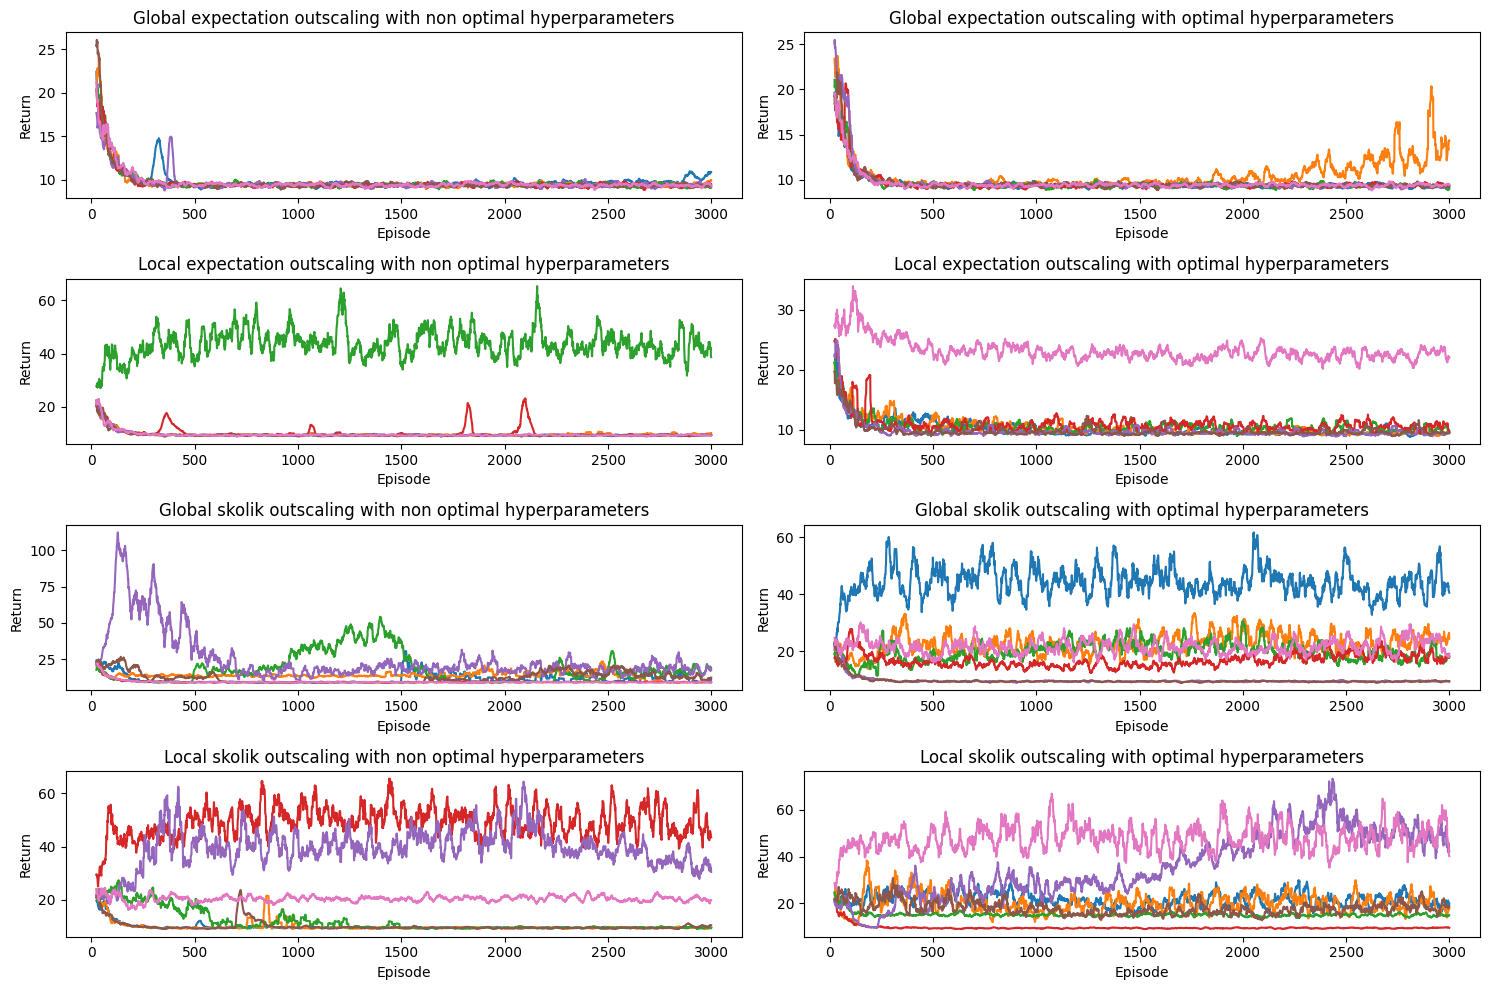

In [4]:
fig, axs = plt.subplots(4, 2, figsize=(15, 10), tight_layout=True)

numbers_of_agents = [gs_exp_non.number_of_agents, gs_exp_opt.number_of_agents, ls_exp_non.number_of_agents, ls_exp_opt.number_of_agents, gs_sko_non.number_of_agents, gs_sko_opt.number_of_agents, ls_sko_non.number_of_agents, ls_sko_opt.number_of_agents]
min_number_of_agents = min(numbers_of_agents)

for i in range(min_number_of_agents):
    axs[0,0].plot(gs_exp_non_moving_average[i])
    axs[0,1].plot(gs_exp_opt_moving_average[i])
    axs[1,0].plot(ls_exp_non_moving_average[i])
    axs[1,1].plot(ls_exp_opt_moving_average[i])
    axs[2,0].plot(gs_sko_non_moving_average[i])
    axs[2,1].plot(gs_sko_opt_moving_average[i])
    axs[3,0].plot(ls_sko_non_moving_average[i])
    axs[3,1].plot(ls_sko_opt_moving_average[i])

axs[0,0].set_title("Global expectation outscaling with non optimal hyperparameters")
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Return")
axs[0,1].set_title("Global expectation outscaling with optimal hyperparameters")
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Return")
axs[1,0].set_title("Local expectation outscaling with non optimal hyperparameters")
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Return")
axs[1,1].set_title("Local expectation outscaling with optimal hyperparameters")
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Return")
axs[2,0].set_title("Global skolik outscaling with non optimal hyperparameters")
axs[2,0].set_xlabel("Episode")
axs[2,0].set_ylabel("Return")
axs[2,1].set_title("Global skolik outscaling with optimal hyperparameters")
axs[2,1].set_xlabel("Episode")
axs[2,1].set_ylabel("Return")
axs[3,0].set_title("Local skolik outscaling with non optimal hyperparameters")
axs[3,0].set_xlabel("Episode")
axs[3,0].set_ylabel("Return")
axs[3,1].set_title("Local skolik outscaling with optimal hyperparameters")
axs[3,1].set_xlabel("Episode")
axs[3,1].set_ylabel("Return")

plt.show()



In [2]:
gs_exp_non_path_XZ_obs = "../../results/continuous/uqc/globalexpectation_outscaling/XZ_obs/skolik_non_optimal_hyper"
gs_exp_opt_path_XZ_obs = "../../results/continuous/uqc/globalexpectation_outscaling/XZ_obs/skolik_optimal_hyper"
gs_sko_non_path_XZ_obs = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_non_optimal_hyper"
gs_sko_opt_path_XZ_obs = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_optimal_hyper"

gs_exp_non_XZ_obs = Analysis(gs_exp_non_path_XZ_obs)
gs_exp_opt_XZ_obs = Analysis(gs_exp_opt_path_XZ_obs)
gs_sko_non_XZ_obs = Analysis(gs_sko_non_path_XZ_obs)    
gs_sko_opt_XZ_obs = Analysis(gs_sko_opt_path_XZ_obs)

In [3]:
gs_exp_non_path_XZ_obs_moving_average = gs_exp_non_XZ_obs.get_moving_average(25)
gs_exp_opt_path_XZ_obs_moving_average = gs_exp_opt_XZ_obs.get_moving_average(25)
gs_sko_non_path_XZ_obs_moving_average = gs_sko_non_XZ_obs.get_moving_average(25)
gs_sko_opt_path_XZ_obs_moving_average = gs_sko_opt_XZ_obs.get_moving_average(25)

Text(0, 0.5, 'Return')

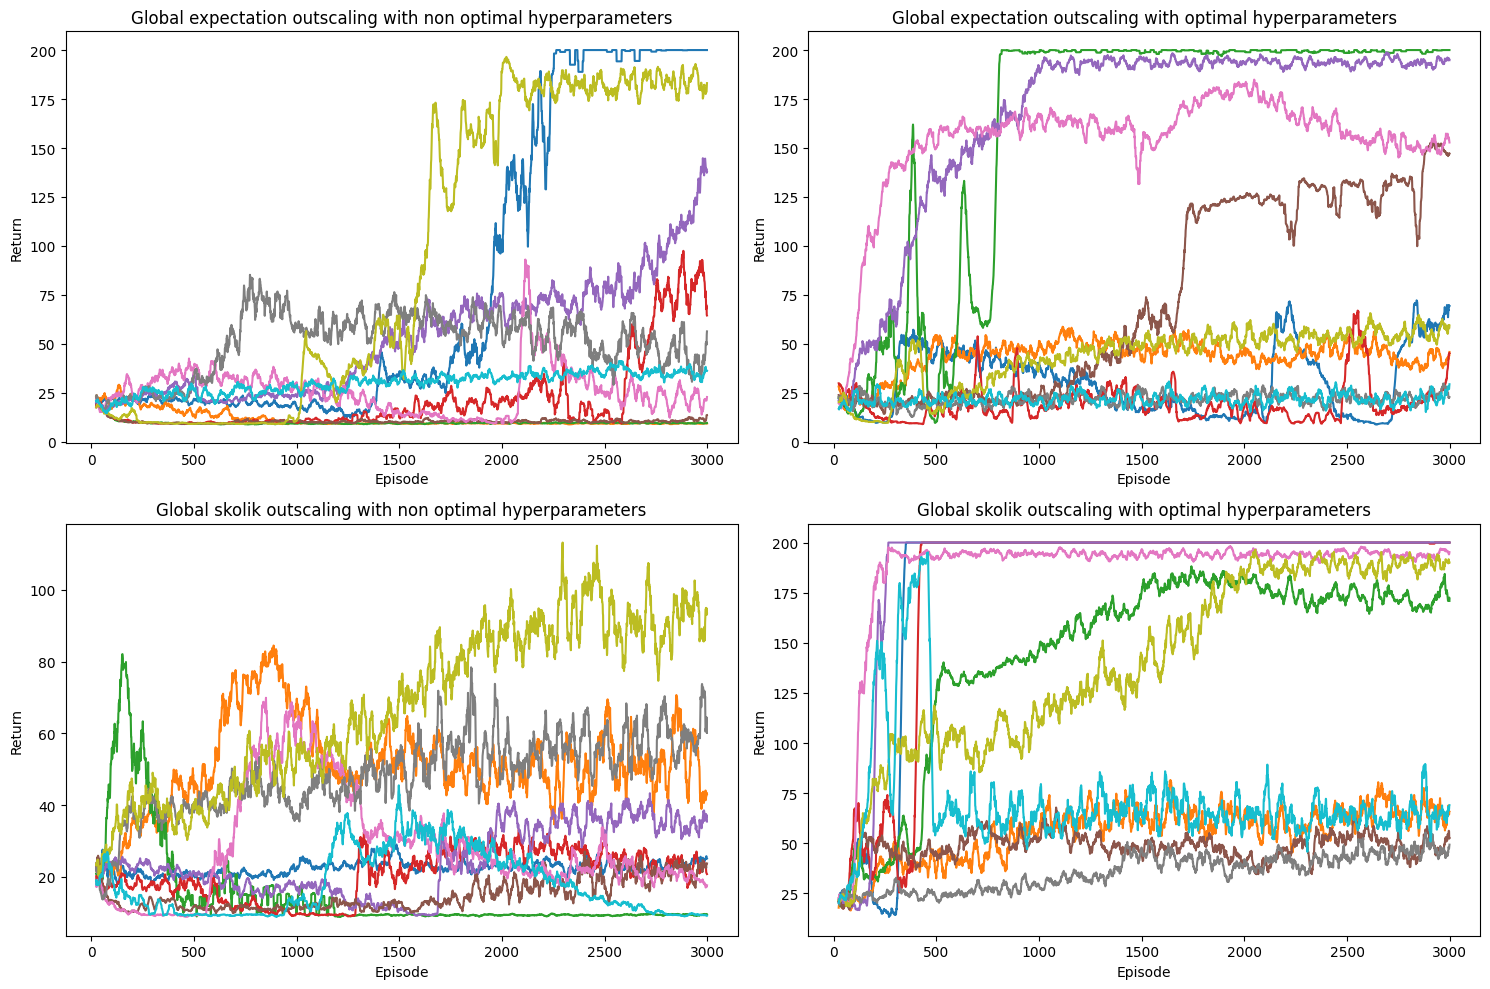

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), tight_layout=True)

for i in range(gs_exp_non_XZ_obs.number_of_agents):
    axs[0,0].plot(gs_exp_non_path_XZ_obs_moving_average[i])
    axs[0,1].plot(gs_exp_opt_path_XZ_obs_moving_average[i])
    axs[1,0].plot(gs_sko_non_path_XZ_obs_moving_average[i])
    axs[1,1].plot(gs_sko_opt_path_XZ_obs_moving_average[i])

axs[0,0].set_title("Global expectation outscaling with non optimal hyperparameters")
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Return")
axs[0,1].set_title("Global expectation outscaling with optimal hyperparameters")
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Return")
axs[1,0].set_title("Global skolik outscaling with non optimal hyperparameters")
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Return")
axs[1,1].set_title("Global skolik outscaling with optimal hyperparameters")
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Return")
